# Python for Machine Learning II

## Copyright notice

This version (c) 2019 Fabian Offert, [MIT License](LICENSE).

## Imports

In [1]:
import numpy as np
import os
from PIL import Image
import numpy as np
import sys
sys.path.append('lib/')
from esu_util import show_img, np_PIL, PIL_np
from scipy.ndimage import convolve

## Dictionaries

Dictionaries extend lists in a useful way: they introduce key value pairs which allow indexing an item by name, rather than by position. Dictionaries in Python use curly brackets, item names are strings, item values follow the name, separated by a colon:

In [2]:
empty_dict = {}
fruit = {'apples':1, 'bananas': 2}

We can get an item from the second dictionary like this:

In [3]:
number_of_apples = fruit['apples']
print(number_of_apples)

1


To loop over a dictionary, Python 3 offers the `items()`function. For instance:

In [4]:
for k, v in fruit.items():
    print(k, v)

apples 1
bananas 2


will print the contents of the dictionary. Keys and values can be accesses separately. Values of keys can be simply overwritten:

In [5]:
fruit['apples'] = 15

To check whether a single key is in the dictionary, use the in keyword:


In [6]:
if 'apples' in fruit:
    print('We have', fruit['apples'], 'apples.')

We have 15 apples.


## Classes

Python is a multi-paradigm programming language. It is not strictly [imperative](https://en.wikipedia.org/wiki/Imperative_programming) or [declarative](https://en.wikipedia.org/wiki/Declarative_programming) but combines feature from both [paradigms](https://en.wikipedia.org/wiki/Programming_paradigm). The building-block like structure of neural networks (or rather the useful abstraction of a building-block like structure), however, lends itself to an object-oriented approach. From Wikipedia:

> Object-oriented programming (OOP) is a programming paradigm based on the concept of "objects", which may contain data, in the form of fields, often known as attributes; and code, in the form of procedures, often known as methods. A feature of objects is that an object's procedures can access and often modify the data fields of the object with which they are associated (objects have a notion of "this" or "self"). In OOP, computer programs are designed by making them out of objects that interact with one another. There is significant diversity of OOP languages, but the most popular ones are class-based, meaning that objects are instances of classes, which typically also determine their type.

Objects are thus arbitrary structures consisting of methods and attributes. We can regard classes as recipes for building objects, or, conversely, we can regard them as abstraction of (future) objects. Classes define which initial attributes and which methods an object will have at its disposal. Objects are *instantiated* from a class. Classes have several predefines methods starting and ending with double underscores. The most commonly used is `__init__`, which is called once when an object is created. Classes - and thus objects - define their own scope, of course. Hence, all class *methods* must take the `self` argument to pass down a reference to the calling object. An example class `Apple` that makes use of all these techniques could be defined like this:

In [7]:
class Apple():
    
    color = 'red'
    diameter = 4
    price = '0.0'
    
    def __init__(self):
        self.price = '1.99'

    def eat(self):
        self.diameter-=1
        if (self.diameter <=0):
            self.diameter = 0

We can now construct an object from the `Apple` class and access its attributes and methods:

In [8]:
a = Apple()
print(a.color)
print(a.price)
print(a.diameter)
a.eat()
print(a.diameter)

red
1.99
4
3


One important technique in OOP is *inheritance*. Inheritance means that we can create new classes that extend existing classes. For instance, climbing further down the ladder of abstraction, we could define a subclass `FujiApple`, which will have all the properties of a regular `Apple`but be more expensive. The base class for a class inheriting properties is defined in parenthesis behind the class name. The following class will have the same attributes and methods as the base class:

In [9]:
class FujiApple(Apple):
    
    def __init__(self):
        self.price = 2.99

In [10]:
b = FujiApple()
print(b.color)
print(b.price)
print(b.diameter)
b.eat()
print(b.diameter)

red
2.99
4
3


## Numpy

[NumPy](http://www.numpy.org/), an extension of the Python programming language for high-performance numerical computation, is an important part of all major machine learning frameworks (TensorFlow and PyTorch). Importantly, NumPy re-introduces multidimensional array with predefined *types* to Python, which helps particularly with machine learning tasks. To quote the NumPy docs:

> NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of positive integers. In NumPy dimensions are called axes.

To create a new 10x10 *NumPy 64 bit floating point array* initialized with zero, we can write:

In [11]:
a = np.zeros([3, 3, 3], dtype=np.float64)

The most important property of a NumPy array, next to its content, is its *shape*. In machine learning, we operate on large, high-dimensional arrays of values that constantly change their shape. Thus, it is important to occasionally check what values, shape, and type an array contains:

In [12]:
print(a)
print(a.shape)
print(a.dtype)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
(3, 3, 3)
float64


NumPy re-implements many Python functions in a more efficient way. For instance, the generation of random numbers in NumPy is provided by the `np.random.random()` function and its cousins. Moreover, most NumPy functions allow passing a `size` parameter (sometimes implicitly, sometimes explicitly) to create matrices directly from functions:

In [13]:
for x in range(10):
    print(np.random.random(), np.random.randint(10))
    
r = np.random.random(size=(3,3))
print(r)

0.20834915950968125 0
0.9853614058550348 0
0.1254535821351812 7
0.8706812006643334 7
0.746395394984061 2
0.6705549395234042 9
0.5659002627533402 5
0.5493255555089184 2
0.943039826809952 1
0.051925178918685866 6
[[0.31038807 0.4341223  0.00357802]
 [0.10252795 0.63584433 0.26691971]
 [0.55502886 0.21646693 0.73509179]]


The more complex multidimensional arrays are, the more important does slicing become. For instance, to return the n-th z-axis plane of our three, dimensional array `a` we can write:

In [14]:
n=1
print(a[:,:,n])

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


A colon indicates that the respective dimension (axis) is returned completely, you can think of it as an "empty" slicing operator. NumPy is an incredibly powerful package. Please read through the [official tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html) to get to know some of the functions its provides.

## <font color='red'>Exercises</font>

1. Define a class `vehicle`, a class `car`, and a class `mercedes`. A Mercedes is a car which is a vehicle. Invent some placeholder attributes and methods (`drive()`, `price`, etc.), and build a Mercedes object.
2. `np.ones` creates NumPy arrays full of ones. Define a three-dimensional array (4x4x4) full of ones and set the value in the first row, second column, third z-plane to 0. Print the array to check if your implementation is correct.

## Walking the file system

Almost every image dataset comes in the form of files, often hundreds and thousands of files. Hence, it is important to be able to move through the file system efficiently. The `os` library makes this really easy. Let's see where we are first. The below command will output our *absolute* path, i.e. the path of the folder we are in right now in relation to the root of our file system (`/`on Unix-like systems).

In [15]:
# Where are we?
os.getcwd()

'/home/fabian/sync/Desktop/dev/Classes/esu'

We can easily create a new folder, too. Note that this time the path of the folder we are creating is stated as a *relative* path, i.e. inr elation to our current working directory. You will see the new folder pop up in the list on the left.

In [16]:
if not os.path.exists('saves'): os.makedirs('saves')

"Walking through" a folder and its subfolders is also easy. `os.walk()` will give us all the subfolders and files of a specified directory.

In [17]:
folder = 'img'
found_files = []
for root, dirs, files in os.walk(folder):
    for file in files:
        found_files.append(f'{root}/{file}')
print(f'{len(found_files)} files found')
print(found_files)

20 files found
['img/embeddings.jpg', 'img/inception.jpg', 'img/rnn.jpg', 'img/pooling.jpg', 'img/tweet.jpg', 'img/shannon.jpg', 'img/banana.jpg', 'img/clouds.jpg', 'img/landscape.jpg', 'img/gan.jpg', 'img/analogy.png', 'img/conv.gif', 'img/person.jpg', 'img/conv3.gif', 'img/conv2.gif', 'img/rnn-math.jpg', 'img/.ipynb_checkpoints/person-checkpoint.jpg', 'img/.ipynb_checkpoints/analogy-checkpoint.png', 'img/.ipynb_checkpoints/shannon-checkpoint.jpg', 'img/.ipynb_checkpoints/clouds-checkpoint.jpg']


`.endswith()` will check for us which of the files are JPEG files. 

In [18]:
# Filter only JPEG images
for file in found_files:
    if file.endswith('.jpg'): 
        print(file)

img/embeddings.jpg
img/inception.jpg
img/rnn.jpg
img/pooling.jpg
img/tweet.jpg
img/shannon.jpg
img/banana.jpg
img/clouds.jpg
img/landscape.jpg
img/gan.jpg
img/person.jpg
img/rnn-math.jpg
img/.ipynb_checkpoints/person-checkpoint.jpg
img/.ipynb_checkpoints/shannon-checkpoint.jpg
img/.ipynb_checkpoints/clouds-checkpoint.jpg


## Showing an image

We will have to deal with two different image formats in this workshop. A `PIL` image and a `NumPy`image. Showing an image within Jupyter Lab requires some "magic" that we imported from the custom `esu_util` library at the top of this notebook.

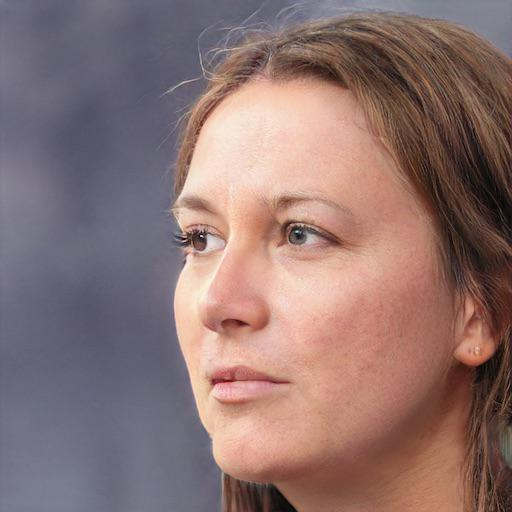

In [19]:
img_PIL = Image.open('img/person.jpg')
show_img(img_PIL)
img_PIL.save('test.jpg') # PIL infers the file format from the extension

## Converting between PIL and NumPy formats

We can only load and save `PIL`-type images. We will only operate on `NumPy`-type images. Thus, we have to convert often. This is fortunately easily done in one line. Our `show_img()` function can handle both types.

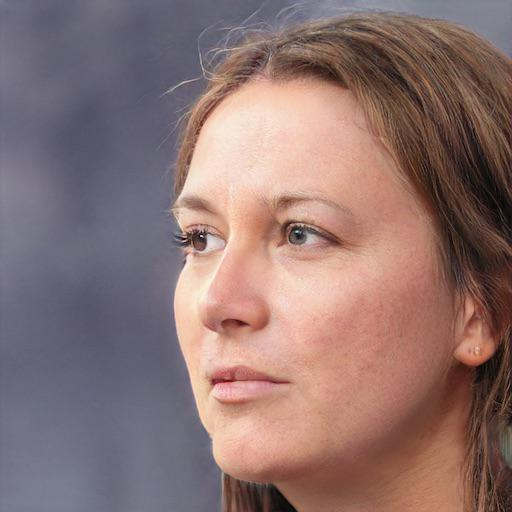

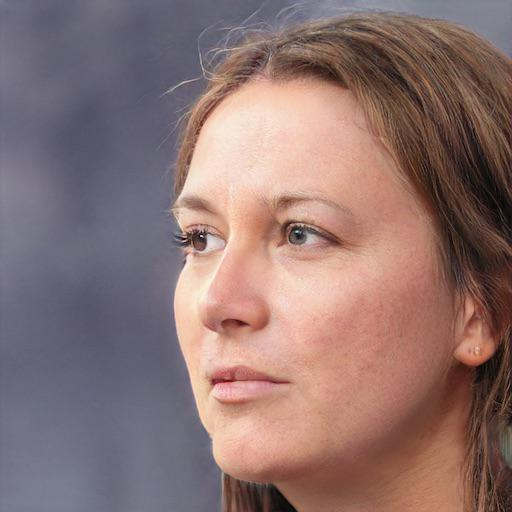

In [20]:
img_np = PIL_np(img_PIL)
show_img(img_np)
img_PIL = np_PIL(img_np)
show_img(img_PIL)

## What is an image?

In Python (for deep learning), images are NumPy arrays, i.e. multi-dimensional matrices. Color images have three channels. For PIL, images are something else: we will only need that to actually look at them in the notebook or write them to disk

In [21]:
print(img_PIL)

<PIL.Image.Image image mode=RGB size=512x512 at 0x7F880F4C5BA8>


(200, 200, 3)


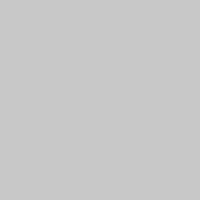

In [22]:
a = np.ones((200,200,3), dtype=np.uint8)*200
print(a.shape) # Show the "shape" of a matrix
show_img(a)

## Manipulating pixels

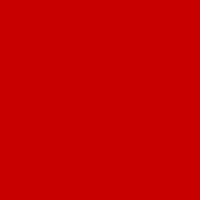

In [23]:
b = a
b[:,:,1:3] = 0 # Leave only the red channel at 255
show_img(b)

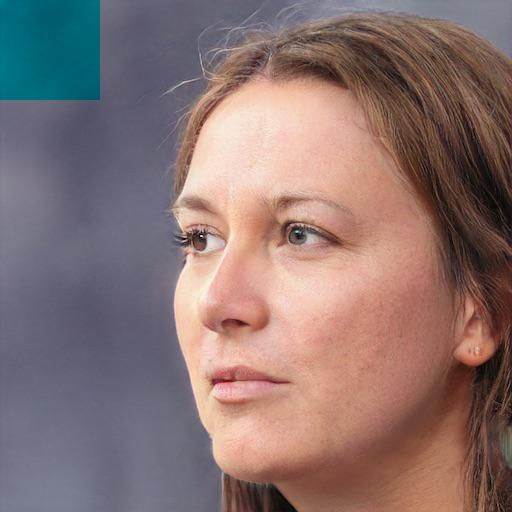

In [24]:
img_np = PIL_np(img_PIL)
img_np[0:100,0:100,0] = 0
show_img(img_np)

## <font color='red'>Exercises</font>

1. Walk your home or documents folder and collect all Word document files, then display only the first three files and the last three files.
2. Create a grey 300x300 pixel image and display it.
3. Re-color 1/3 of the image red, 1/3 green, 1/3 blue and display it.

## Convolution

[Convolution](https://en.wikipedia.org/wiki/Convolution) ist arguably the most important concept in image-based machine learning. In short, convolution is a method to emphasize features in images by running a kernel - a small matrix - over an image - a large matrix - line by line and changing each pixel.

![](img/conv.gif) 

![](img/conv2.gif)

![](img/conv3.gif)

We can use the `convolve` function supplied by the scipy package to apply convolution to an image. All we need is a NumPy array that defines a kernel, for instance an approximate [Gaussian kernel](https://en.wikipedia.org/wiki/Kernel_(image_processing)) that blurs an image.

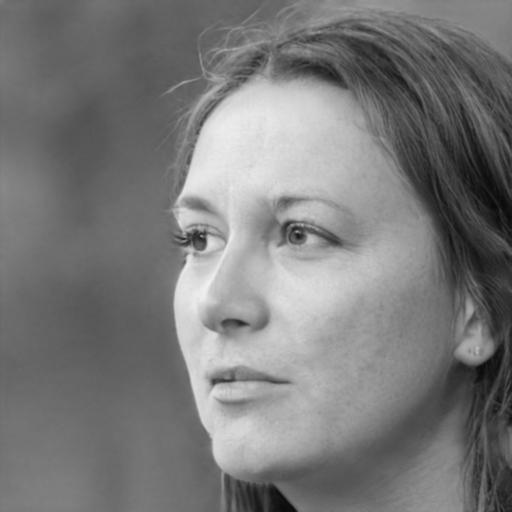

In [27]:
# Open image, convert to grayscale
img_PIL = Image.open('img/person.jpg').convert('L')

# Convert image to NumPy array
img = PIL_np(img_PIL)

# Define Gaussian blur kernel
kernel_gaussian = 1/16 * np.array([[1,2,1],[2,4,2],[1,2,1]])

# Run the kernel over the image with the help of scipy_convolve
show_img(np_PIL(convolve(img, kernel_gaussian)))

We can also use convolution to implement other kinds of filters, for instance a sharpen filter that reverses the Gaussian blur filter.

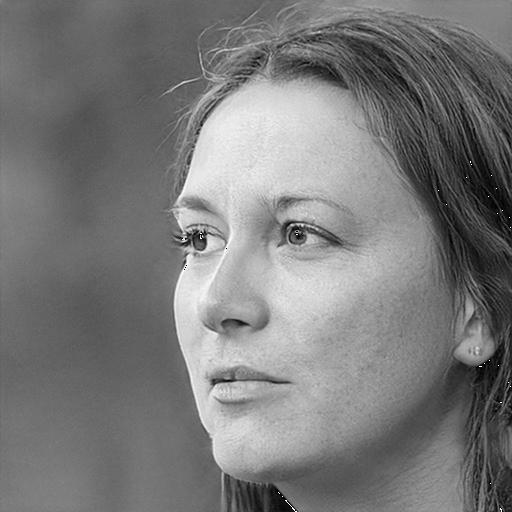

In [28]:
# Define sharpen kernel
kernel_sharpen = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
show_img(np_PIL(convolve(convolve(img, kernel_gaussian), kernel_sharpen)))

## <font color='red'>Exercises</font>

1. To implement convolution from scratch, we need a function that loops over every single pixel in an image and changes its value. Write a function that takes a numpy array, loops over every pixel in that object and changes it, for instance by adding or subtracting a number. Play with the effects of the changes on the image. Advanced: implement the actual convolution function as `custom_convolve`.
2. Convolution runs into problems at the border of an image: what are potential solutions? (No implementation, just think about it).